12.6.9 pg. 550-551
9. Consider the USArrests data. We will now perform hierarchical clustering on the states.

  (a) Using hierarchical clustering with complete linkage and
Euclidean distance, cluster the states.

  (b) Cut the dendrogram at a height that results in three distinct
clusters. Which states belong to which clusters?

  (c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

  (d) What effect does scaling the variables have on the hierarchical
clustering obtained? In your opinion, should the variables be
scaled before the inter-observation dissimilarities are computed?
Provide a justification for your answer.

In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch
from scipy import cluster
from scipy.spatial import distance_matrix
import random
from sklearn import preprocessing

In [5]:
# Functions
def link_m(model):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    # Create Linkage Matrix
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    return(linkage_matrix)


def plot_dendrogram(model, **kwargs):
    linkage_matrix = link_m(model)
    # Plot Dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [6]:
# Set Seed
random.seed(1)

# Read in Data
USArrests = pd.read_csv("USArrests.csv", index_col = 0)

(a) Using hierarchical clustering with complete linkage and
Euclidean distance, cluster the states.

In [7]:
# Unused: Method to Create Distance Matrix
#dist = distance_matrix(USArrests.to_numpy(), USArrests.to_numpy(), p = 2) # p = 2 indicates Euclidean Distance - May not need this

In [8]:
# Create Agglomerative Clustering Model
model = AgglomerativeClustering(linkage = "complete", metric = "euclidean", compute_distances = True)

# Fit the Model
hc_complete = model.fit(USArrests)

(b) Cut the dendrogram at a height that results in three distinct
clusters. Which states belong to which clusters?

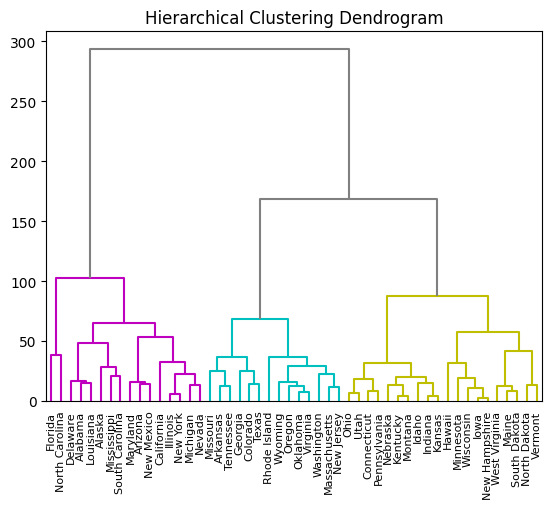

In [9]:
# Create Dendrogram
sch.set_link_color_palette(['m', 'c', 'y'])
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(hc_complete, labels = USArrests.index, color_threshold = 110, above_threshold_color = 'grey')
plt.xlabel("")
plt.show()

In [10]:
# Cut Dendrogram at 3 Clusters
num_clusters = sch.cut_tree(link_m(hc_complete), n_clusters = 3)
num_clusters = num_clusters + 1 # To match up to R
num_clusters = pd.Series([i[0] for i in num_clusters], index = USArrests.index)
# Show Values
print(num_clusters)

Alabama           1
Alaska            1
Arizona           1
Arkansas          2
California        1
Colorado          2
Connecticut       3
Delaware          1
Florida           1
Georgia           2
Hawaii            3
Idaho             3
Illinois          1
Indiana           3
Iowa              3
Kansas            3
Kentucky          3
Louisiana         1
Maine             3
Maryland          1
Massachusetts     2
Michigan          1
Minnesota         3
Mississippi       1
Missouri          2
Montana           3
Nebraska          3
Nevada            1
New Hampshire     3
New Jersey        2
New Mexico        1
New York          1
North Carolina    1
North Dakota      3
Ohio              3
Oklahoma          2
Oregon            2
Pennsylvania      3
Rhode Island      2
South Carolina    1
South Dakota      3
Tennessee         2
Texas             2
Utah              3
Vermont           3
Virginia          2
Washington        2
West Virginia     3
Wisconsin         3
Wyoming           2


In [11]:
# Split By Cluster
high_crime_cluster = num_clusters[num_clusters == 1]
mid_crime_cluster = USArrests[num_clusters == 2]
low_crime_cluster = USArrests[num_clusters == 3]

In [12]:
# Show Cluster
print("Number of States: " + str(len(high_crime_cluster)))
high_crime_cluster

Number of States: 16


Alabama           1
Alaska            1
Arizona           1
California        1
Delaware          1
Florida           1
Illinois          1
Louisiana         1
Maryland          1
Michigan          1
Mississippi       1
Nevada            1
New Mexico        1
New York          1
North Carolina    1
South Carolina    1
dtype: int64

In [13]:
# Find By Index
num_clusters['Virginia']

2

(c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

In [14]:
# Scale Data
scaled_data = (USArrests-USArrests.mean())/USArrests.std() # Alternate Method

# Create Agglomerative Clustering Model
model = AgglomerativeClustering(linkage = "complete", metric = "euclidean", compute_distances = True)

# Fit the Model
scaled_hc_complete = model.fit(scaled_data)

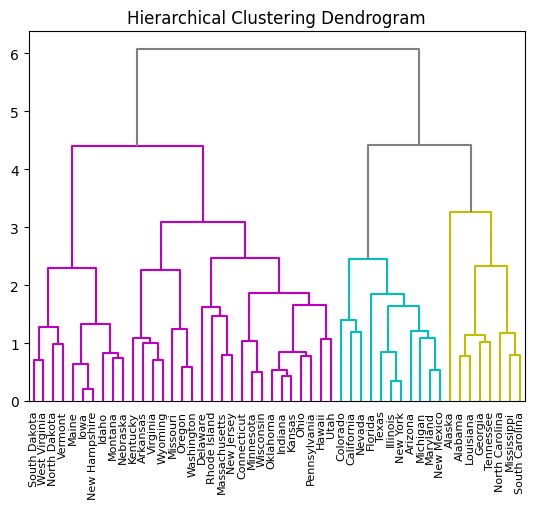

In [15]:
# Create Dendrogram
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(scaled_hc_complete, labels = USArrests.index, color_threshold = 4.42, above_threshold_color = 'grey')
plt.xlabel("")
plt.show()

In [16]:
# Cut Dendrogram at 3 Clusters
num_clusters_scaled = sch.cut_tree(link_m(scaled_hc_complete), n_clusters = 3)
num_clusters_scaled = num_clusters_scaled + 1 # To match up to R
num_clusters_scaled = pd.Series([i[0] for i in num_clusters_scaled], index = USArrests.index)
print(num_clusters_scaled)

Alabama           1
Alaska            1
Arizona           2
Arkansas          3
California        2
Colorado          2
Connecticut       3
Delaware          3
Florida           2
Georgia           1
Hawaii            3
Idaho             3
Illinois          2
Indiana           3
Iowa              3
Kansas            3
Kentucky          3
Louisiana         1
Maine             3
Maryland          2
Massachusetts     3
Michigan          2
Minnesota         3
Mississippi       1
Missouri          3
Montana           3
Nebraska          3
Nevada            2
New Hampshire     3
New Jersey        3
New Mexico        2
New York          2
North Carolina    1
North Dakota      3
Ohio              3
Oklahoma          3
Oregon            3
Pennsylvania      3
Rhode Island      3
South Carolina    1
South Dakota      3
Tennessee         1
Texas             2
Utah              3
Vermont           3
Virginia          3
Washington        3
West Virginia     3
Wisconsin         3
Wyoming           3


In [17]:
# Split By Cluster
high_crime_cluster = num_clusters_scaled[num_clusters_scaled == 1]
mid_crime_cluster = num_clusters_scaled[num_clusters_scaled == 2]
low_crime_cluster = num_clusters_scaled[num_clusters_scaled == 3]

In [18]:
# Show Cluster
print("Number of States: " + str(len(high_crime_cluster)))
high_crime_cluster

Number of States: 8


Alabama           1
Alaska            1
Georgia           1
Louisiana         1
Mississippi       1
North Carolina    1
South Carolina    1
Tennessee         1
dtype: int64

In [19]:
# Find By Index
num_clusters_scaled['Virginia']

3

(d) What effect does scaling the variables have on the hierarchical
clustering obtained? In your opinion, should the variables be
scaled before the inter-observation dissimilarities are computed?
Provide a justification for your answer.

In [20]:
# Changes in Cluster
num_clusters.rename("not_scaled", inplace = True)
num_clusters_scaled.rename("scaled", inplace = True)
clusters = pd.merge(num_clusters, num_clusters_scaled, right_index = True, left_index = True)
print(clusters[clusters['not_scaled'] != clusters['scaled']])

               not_scaled  scaled
Arizona                 1       2
Arkansas                2       3
California              1       2
Delaware                1       3
Florida                 1       2
Georgia                 2       1
Illinois                1       2
Maryland                1       2
Massachusetts           2       3
Michigan                1       2
Missouri                2       3
Nevada                  1       2
New Jersey              2       3
New Mexico              1       2
New York                1       2
Oklahoma                2       3
Oregon                  2       3
Rhode Island            2       3
Tennessee               2       1
Virginia                2       3
Washington              2       3
Wyoming                 2       3


In [21]:
# Increase or Decrease
print("Cluster Classification Drop: " + str(len(clusters[clusters['not_scaled']<clusters['scaled']])))
print("Cluster Classification Increase: " + str(len(clusters[clusters['not_scaled']>clusters['scaled']])))

Cluster Classification Drop: 20
Cluster Classification Increase: 2


When scaled, the data is less evenly distributed in clusters. There are significantly more states in the 3rd cluster, which represents the cluster with the lower crime rates.

We believe scaling the data is useful in many situations, but may be less useful here. This is because the unscaled data clusters based on the actual amount of violent crime, while the scaled data reduces this level of interpretation because all types of crime have equal weight, even if the quantity of crimes reported is less in certain categories. Scaling would be more useful in a dataset where the features are not representing categories of the same umbrella feature (i.e. crime), and instead are very dissimilar to one another (i.e. average salary and population).